In [1]:
import numpy as np

import matplotlib.pyplot as plt


import scipy
from scipy import linalg

#https://gist.github.com/samubernard/746c684771bc74d446ec

# Decompositions

- $PLU$
- Cholesky
- $QR$


---

## LU 

[wiki entry](https://en.wikipedia.org/wiki/LU_decomposition)

It turns out that a proper permutation in rows (or columns) is sufficient for LU factorization. LU factorization with partial pivoting (LUP) refers often to LU factorization with row permutations only:

$PA=LU$

where 
- L and U are again lower and upper triangular matrices
- P is a permutation matrix, which, when left-multiplied to A, reorders the rows of A.

It turns out that all square matrices can be factorized in this form 
[Pavel Okunev, Charles R. Johnson 1997](https://arxiv.org/abs/math/0506382)

and the factorization is numerically stable in practice.

This makes LUP decomposition a useful technique in practice.


Look at [discussion and python 2 code](https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy/)

In [102]:
A = np.array([1,4,-1,2]).reshape(2,2)

In [14]:
scipy.linalg.lu(A)

(array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 1.]]),
 array([[1., 1.],
        [0., 1.]]))

In [155]:
B = [-1,3,0,1,0,-4,2,0,5]
B = np.array(B).reshape(3,3)
B

array([[-1,  3,  0],
       [ 1,  0, -4],
       [ 2,  0,  5]])

In [159]:
P,L,U = scipy.linalg.lu(B)

In [178]:
P @ L @ U 

array([[-1.,  3.,  0.],
       [ 1.,  0., -4.],
       [ 2.,  0.,  5.]])

In [179]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [180]:
np.linalg.inv(P) @ B

array([[ 2.,  0.,  5.],
       [-1.,  3.,  0.],
       [ 1.,  0., -4.]])

In [157]:
np.linalg.solve(B,[1,2,3])

array([ 1.69230769,  0.8974359 , -0.07692308])

In [174]:
np.linalg.inv(P) @ [1,2,3]

array([3., 1., 2.])

---

## Solving linear equations

Given a system of linear equations in matrix form

$ A\mathbf {x} =\mathbf {b} $
we want to solve the equation for x, given A and b. 

Suppose we have already obtained the $LUP$ decomposition of $A$ such that

$PA=LU$ , so $LU\mathbf {x} =P\mathbf {b}$.

In this case the solution is done in two logical steps:

1. solve the equation
$L\mathbf {y} =P\mathbf {b} $ for y.
1. solve the equation $U\mathbf {x} =\mathbf {y} $ for x.


In both cases we are dealing with triangular matrices (L and U), which can be solved directly **by forward and backward substitution** without using the Gaussian elimination process (however we do need this process or equivalent to compute the LU decomposition itself).

In [6]:

a = 1
A = np.array([a,1,1,2]).reshape(2,2)

In [8]:
import scipy

In [15]:
scipy.linalg.lu(A)

(array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 1.]]),
 array([[1., 1.],
        [0., 1.]]))

## non trivial permutation 

In [25]:
a = 0
A = np.array([a,1,1,2]).reshape(2,2)
P, L , U = scipy.linalg.lu(A)
P

array([[0., 1.],
       [1., 0.]])

In [26]:
P @ U, U

(array([[0., 1.],
        [1., 2.]]),
 array([[1., 2.],
        [0., 1.]]))

## singular decomposition

In [31]:
a = .5
A = np.array([a,1,1,2]).reshape(2,2)
P, L , U = scipy.linalg.lu(A)
L, U

(array([[1. , 0. ],
        [0.5, 1. ]]),
 array([[1., 2.],
        [0., 0.]]))

---

# Cholesky


[wiki](https://en.wikipedia.org/wiki/Cholesky_decomposition)

In linear algebra, the Cholesky decomposition 
is a decomposition of a matrix $\mathbf {A}$ which is
1. Hermitian
1. positive-definite

into the product of a lower triangular matrix and its conjugate transpose ie

$\mathbf {A} =\mathbf {LL} ^{*}$


- useful for efficient numerical solutions, e.g., Monte Carlo simulations.
- discovered by André-Louis Cholesky for real matrices, and posthumously published in 1924.
- roughly twice as efficient as the LU decomposition for solving systems of linear equations.

The recipe for the coefficients of $\mathbf {L}$  is :

- diagonal elements $l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}$
- off diagonal elts $l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)$



In [90]:
A = np.array([1,2,1,2,13, -1,1,-1, 3]).reshape(3,3)
A 

array([[ 1,  2,  1],
       [ 2, 13, -1],
       [ 1, -1,  3]])

In [3]:
import scipy.linalg

In [19]:
scipy.linalg.cholesky(A).T

array([[ 1.,  0.,  0.],
       [ 2.,  3.,  0.],
       [ 1., -1.,  1.]])

In [18]:
np.array(cholesky(A))

array([[ 1.,  0.,  0.],
       [ 2.,  3.,  0.],
       [ 1., -1.,  1.]])

In [5]:
A = np.array([16,-8,4,-8,5,-3,4,-3,11]).reshape(3,3)

scipy.linalg.cholesky(A)

array([[ 4., -2.,  1.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  3.]])

In [168]:
def cholesky(A):
    '''Performs a Cholesky decomposition 
    A, which must be a symmetric and positive definite matrix. 
    returns L = lower variant triangular matrix
    such that A = L L^*'''
    
    
    n = len(A)
    # Initialise L as the zero matrix
    L = np.zeros((n,n))

    for i in range(n):
        # under the diagonal
        for k in range(i):
             # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
            L[i,k] = ( (A[i,k] - L[i,:] @  L[k,:]) / L[k,k] )
        
        #on the diagonal
        # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
        L[i,i] = sqrt(A[i,i] -  L[i,:] @  L[i,:])

    return L

L = cholesky(A)

L, L @ L.T 

(array([[ 1.,  0.,  0.],
        [ 2.,  3.,  0.],
        [ 1., -1.,  1.]]),
 array([[ 1.,  2.,  1.],
        [ 2., 13., -1.],
        [ 1., -1.,  3.]]))

---

# QR decompositions


[source](https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/)

There are a several different algorithms for calculating the matrices $Q$ and $R$. 

We will outline the method of <a href="http://en.wikipedia.org/wiki/Householder_transformation">Householder Reflections</a>, which is known to be **more numerically stable** than the  alternative Gramm-Schmidt method.

For more details see  <a href="http://en.wikipedia.org/wiki/QR_decomposition#Using_Householder_reflections">QR Decomposition using Householder Reflections.

A **Householder Reflection** is a linear transformation that enables a vector to be reflected through a plane or hyperplane. Essentially, we use this method because we want to create an upper triangular matrix, $R$. The householder reflection is able to carry out this vector reflection such that all but one of the coordinates disappears. The matrix $Q$ will be built up as a sequence of matrix multiplications that eliminate each coordinate in turn, up to the rank of the matrix $A$.

**First step** create the vector $\mathbb{x}$, which is the $k$-th column of the matrix $A$, for step $k$.
    
 We define $\alpha = -sgn(\mathbb{x}_k)(||\mathbb{x}||)$. The norm $||\cdot||$ used here is the *Euclidean norm*. 

 Given the first column vector of the identity matrix, $I$ of equal size to $A$, $\mathbb{e}_1 = (1,0,...,0)^T$, we create the vector $\mathbb{u}$:

\begin{eqnarray*}
\mathbb{u} = \mathbb{x} + \alpha \mathbb{e}_1
\end{eqnarray*}

<p>Once we have the vector $\mathbb{u}$, we need to convert it to a unit vector, which we denote as $\mathbb{v}$:</p>

\begin{eqnarray*}
\mathbb{v} = \mathbb{u}/||\mathbb{u}||
\end{eqnarray*}

**Second step** form the matrix of the Householder transformation $Q$ associated to $\mathbb{v}$ :

\begin{eqnarray*}
Q = I - 2 \mathbb{v} \mathbb{v}^T
\end{eqnarray*}

**Third step** $Q$ is now an $m\times m$ Householder matrix, with $Q\mathbb{x} = \left( \alpha, 0, ..., 0\right)^T$. We will use $Q$ to transform $A$ to upper triangular form, giving us the matrix $R$. 
    
Write  $Q_k$ for $Q$ at the $k$th tep  and, since $k=0$ in this first step, we have $Q_0$ as our first Householder matrix. 
Muliplying by   $A$ gives us:

\begin{eqnarray*}
Q_0A = \begin{bmatrix} \alpha_1&\star&\dots&\star\\ 0 & & & \\ \vdots & & A' & \\ 0 & & & \end{bmatrix}
\end{eqnarray*}

---
    
 The whole process is **recursive** and we repeat the 3 steps above for the minor matrix $A'$, which will give a second Householder matrix $Q'_1$. Now we have to "pad out" this minor matrix with elements from the identity matrix such that we can consistently multiply the Householder matrices together. Hence, we define $Q_k$ as the block matrix:

\begin{eqnarray*}
Q_k = \begin{pmatrix} I_{k-1} & 0\\ 0 & Q_k'\end{pmatrix}
\end{eqnarray*}

<p>Once we have carried out $t$ iterations of this process we have $R$ as an upper triangular matrix:</p>

\begin{eqnarray*}
R = Q_t ... Q_2 Q_1 A
\end{eqnarray*}

<p>$Q$ is then fully defined as the multiplication of the transposes of each $Q_k$:</p>

\begin{eqnarray*}
Q = Q^T_1 Q^T_2 ... Q^T_t
\end{eqnarray*}

<p>This gives $A=QR$, the QR Decomposition of $A$.</p>

In [383]:
def QR_householder(A):
    '''Performs a Householder Reflections based QR becomposition of the                                               
    matrix A an np.array
    Returns 
    - Q, an orthogonal matrix
    - R upper triangular matrix 
    such that A = QR.
    '''
    
    n = A.shape[0]
    # Set R equal to A, and Q to the identity matrix of the same size
    R = A
    Q = np.identity(n)

    # The Householder procedure
    for k in range(n-1):  #  reduce the index by 1 to skip the 1x1 matrix

        # get the vectors x, e and the scalar alpha
        x = R[k:,k]
        e_0 = np.identity(n-k)[0]
        alpha = -np.sign(x[0]) * np.linalg.norm(x)

        u = x + alpha*e_0
        v = u/np.linalg.norm(u)
        
        # matrix of the reflection x -> x - 2<v,x>v
        Householder_matrix = np.identity(n-k) -  2*np.array([ v[i]*v for i  in range(n-k)])
    
        # pad out the matrix to match A.shape()
        Q_k = np.identity(n)
        Q_k[k:,k:] = Householder_matrix
     
        Q = Q_k @ Q
        R = Q_k @ R

    # Q is the inverse of the product of the Q_k
    # we need to take the transpose/inverse now
    return Q.T, R

A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]])

Q, R = QR_householder(A)

Q, R

(array([[ 0.85714286,  0.39428571, -0.33142857],
        [ 0.42857143, -0.90285714,  0.03428571],
        [-0.28571429, -0.17142857, -0.94285714]]),
 array([[ 1.40000000e+01,  2.10000000e+01, -1.40000000e+01],
        [-5.50670620e-16, -1.75000000e+02,  7.00000000e+01],
        [ 3.01980663e-16, -3.63797881e-14,  3.50000000e+01]]))

In [350]:
QR(A)

[[35.]]
[[-1.75000000e+02  7.00000000e+01]
 [-3.55271368e-14  3.50000000e+01]]


(array([[ 0.85714286,  0.42857143, -0.28571429],
        [ 0.42857143, -0.90285714,  0.03428571],
        [-0.28571429, -0.17142857, -0.94285714]]),
 array([[ 1.40000000e+01,  2.10000000e+01, -1.40000000e+01],
        [-4.44089210e-16, -1.75000000e+02,  7.00000000e+01],
        [ 4.44089210e-16, -3.55271368e-14,  3.50000000e+01]]))

In [433]:
def mgs(A):
    """factorisation QR Gram-Schmidt modifiée - stable
    
    Note:
    Cette factorisation est stable numériquement
    Tire de: LN Trefethen & D Bau III, Numerical Linear Algebra, 1997 SIAM Philadelphia 
    """
    
    n = A.shape[0]

    R = np.zeros((n,n))
    Q = np.zeros((n,n))
    v = A.copy()

    for i in range(0, n):

        # diagonal elements are norms
        R[i,i] = np.linalg.norm(v[:,i])
        Q[:,i] = v[:,i]/R[i,i]
        for j in range(i+1, n):
            R[i,j] = Q[:,i] @ v[:,j]
            #make ortho to the other columns
            v[:,j] = v[:,j] - R[i,j]*Q[:,i]
            

    return Q,R

A = np.array([[2,1,1],[1,1,1],[0,1,1]]).astype(float)

B = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]).T

Q,R = mgs(A)

Q @ R

array([[2., 1., 1.],
       [1., 1., 1.],
       [0., 1., 1.]])

array([[ 0.99007253,  0.00227986, -0.01273753],
       [ 0.00227986,  0.99965025,  0.00507632],
       [-0.01273753,  0.00507632,  1.01027722]])

In [423]:
for i in range(3):
    print(np.linalg.norm(Q[:,i]))

0.9999999999999999
0.9999999999999999
1.0


---
# random positive matrix

[see discussion](https://math.stackexchange.com/questions/357980/how-to-generate-random-symmetric-positive-definite-matrices-using-matlab) for alternatives and discussion of Wishart.

In [319]:
def R_v(u):
    n = len(u)
    v = u / np.linalg.norm(u)
    return np.identity(n) -  2*np.array([ v[i]*v for i  in range(n)])

#random reflection
A = R_v(np.random.rand(3))
D = np.diag(np.random.rand(3))
M = A @ D @ A.T

Q,R = QR(M)

In [320]:
M, Q @ R

(array([[ 0.77465838, -0.01980158,  0.13277845],
        [-0.01980158,  0.91026829,  0.01146016],
        [ 0.13277845,  0.01146016,  0.66838112]]),
 array([[ 0.77465838, -0.06281761,  0.34655081],
        [-0.01980158,  0.91026829,  0.01146016],
        [ 0.13277845,  0.01146016,  0.66838112]]))

---

# Recursive version

Same method but avoids doing the loop.

In [361]:
def QR(A):
    '''Performs a Householder Reflections based QR becomposition of the                                               
    matrix A an np.array
    Returns 
    - Q, an orthogonal matrix
    - R upper triangular matrix 
    such that A = QR.
    '''
    
    n = A.shape[0]
    
    # base case 1x1 matrix do nothing
    if  n == 1 : return [1], A
    
    R = A.copy()
  
    # get the vectors x, e and the scalar alpha
    x = R[:,0]
    e_0 = np.identity(n)[0]
    alpha = -np.sign(x[0]) * np.linalg.norm(x)

    u = x + alpha*e_0
    v = u/np.linalg.norm(u)

    # Householder matrix of the reflection x -> x - 2<v,x>v
    Q = np.identity(n) -  2*np.array([ v[i]*v for i  in range(n)]) 
    
    R = Q @ R
    
    # do recursion on the smaller block
    Q1, R1 = QR(R[1:,1:])
    
    # copy the results into Q, R
    Q[0,1:] =  Q[0,1:] @ Q1
    R[1:,1:] = R1
 
    
    return Q, R
    
    
A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]])

Q, R = QR(A)


Q @ R, R

(array([[  12.,  -51.,    4.],
        [   6.,   59.,    4.],
        [  -4., -156.,   79.]]),
 array([[ 1.40000000e+01,  2.10000000e+01, -1.40000000e+01],
        [-4.44089210e-16, -1.75000000e+02,  7.00000000e+01],
        [ 4.44089210e-16, -3.55271368e-14,  3.50000000e+01]]))

In [356]:
Q[:,1:] 

array([[ 0.39428571, -0.33142857],
       [-0.90285714,  0.03428571],
       [-0.17142857, -0.94285714]])

--- 

# eigenvalues using QR

[source](https://www.andreinc.net/2021/01/25/computing-eigenvalues-and-eigenvectors-using-qr-decomposition#:~:text=Even%20if%20it's%20not%20very,Q%20is%20an%20orthonormal%20matrix.)



! pip install tabulate

In [370]:
import numpy as np
from tabulate import tabulate

# A is a square random matrix of size n
n = 5
A = np.random.rand(n, n)
print("A=")
print(tabulate(A))

def eigen_qr_simple(A, max_iter=500000):
    Ak = np.copy(A)
    n = A.shape[0]
    QQ = np.eye(n)
    peek_time = max_iter // 5
    TT = []
    for k in range(max_iter):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        QQ = QQ @ Q
        # we "peek" into the structure of matrix A from time to time
        # to see how it looks
        if k % peek_time == 0:
            print("A",k,"=")
            print(tabulate(Ak))
            print("\n")
            
        # break if the lower triangular entries all close to 0
        TT.append(np.max(np.abs(np.tril(Ak, k = -1))) )
        if  TT[-1] < .001: break
    
    # return diagonal elts and the errors
    return [Ak[k,k] for k in range(Ak.shape[0] )], TT


eigen_qr_simple(A)
# We compare our results with the official numpy algorithm
print(np.linalg.eigvals(A))


A=
---------  --------  --------  ---------  --------
0.299394   0.118583  0.381981  0.839952   0.407252
0.892641   0.566076  0.10782   0.371783   0.142298
0.0164034  0.435248  0.488469  0.0637994  0.16179
0.662848   0.123152  0.19896   0.494253   0.427521
0.0480434  0.414211  0.381524  0.209435   0.610223
---------  --------  --------  ---------  --------
A 0 =
----------  ----------  ----------  ----------  ----------
 1.22089     0.332197    0.95081    -0.343304   -0.0725795
 0.539872    0.688301   -0.123168    0.0728586   0.0771148
 0.380213    0.4204      0.422193    0.449542   -0.353498
-0.199548    0.0419301  -0.141802   -0.160352    0.19785
-0.0161909  -0.242044   -0.0409157   0.088081    0.287384
----------  ----------  ----------  ----------  ----------


A 100000 =
-------  ----------  ---------  -------------  ----------
1.78964  -0.0695592  -0.3317    -0.00783565     0.155058
0         0.506447    0.39478   -0.137275      -0.0518464
0        -0.51631     0.253879  -0.47544

In [252]:
def horner(x, P):
    val = 0
    for coeff in reversed(P):
        val *= x
        val += coeff
        
    return val

def companion(P):
    n = len(P) - 1
    C = np.zeros((n,n))
    C[1:,:-1] = np.identity(n-1)
    C[:,-1] = [-x/P[-1] for x in P[:-1]]
    return C


In [368]:
P = [6,-5,-2,1]
[ (x, horner( np.round(x) ,P)) for x in np.linalg.eigvals( companion(P)) ]


[(-2.000000000000001, 0.0),
 (1.0000000000000016, 0.0),
 (2.9999999999999987, 0.0)]

---

# convergence 

In [371]:
ev, error = eigen_qr_simple(companion(P), max_iter=20000)

A 0 =
-  -  --
0  5  -1
1  2   0
0  6   0
-  -  --




In [294]:
import matplotlib.pyplot as plt

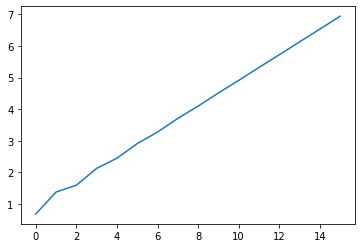

In [302]:
plt.plot(-np.log(np.array(error[5:])));

In [321]:
import scipy.stats

In [328]:
scipy.stats.linregress(np.arange(len(error[5:])), -np.log(np.array(error[5:])) )

LinregressResult(slope=0.408019227400153, intercept=0.835759338711056, rvalue=0.9995490361038322, pvalue=1.015817221878054e-22, stderr=0.0032760417149693996, intercept_stderr=0.02884033325331076)

--- 

# partial pivot 

## finding P in P @ L @ U


Note that the decomposition obtained through this procedure is a Doolittle decomposition: the main diagonal of L is composed solely of 1s. If one would proceed by removing elements above the main diagonal by adding multiples of the columns (instead of removing elements below the diagonal by adding multiples of the rows), we would obtain a Crout decomposition, where the main diagonal of U is of 1s.

Another (equivalent) way of producing a Crout decomposition of a given matrix A is to obtain a Doolittle decomposition of the transpose of A. Indeed, if $ A^T=L_{0}U_{0}$ is the LU-decomposition obtained through the algorithm presented in this section, then by taking $L=U_{0}^T$ and $U=L_{0}^T$, we have that $A=LU$ is a Crout decomposition.


In [114]:
def pivot_matrix(M):
    """Returns the pivoting matrix for M, used in Doolittle's method."""
    m = len(M)

    # Create an identity matrix, with floating point values                                                                                                                                                                                            
    id_mat = [[float(i == j) for i in range(m)] for j in range(m)]

    # Rearrange the identity matrix such that the largest element of                                                                                                                                                                                   
    # each column of M is placed on the diagonal of of M                                                                                                                                                                                               
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[i][j]))
        if j != row:
            # Swap the rows                                                                                                                                                                                                                            
            id_mat[j], id_mat[row] = id_mat[row], id_mat[j]

    return id_mat

In [149]:
M = np.array([0,1,1,1]).reshape(2,2)

In [115]:
pivot_matrix(M)

[[0.0, 1.0], [1.0, 0.0]]

In [152]:
def pivot_m(M):
    """Returns the pivoting matrix for M, 
    used in Doolittle's method."""
    m = len(M)
    P = np.identity(m, dtype=np.int32)

    # Rearrange P such that the largest element of                                                                                                                                                                                   
    # each column of M is placed on the diagonal of of M                                                                                                                                                                                               
    for j in range(m):
        row = max(range(j, m), key = lambda i: abs(M[i,j]))
        if j != row:
            # Swap the rows                                                                                                                                                                                                                            
            P[[j,row]] = P[[row,j]]

    return P

In [153]:
pivot_m(M)

array([[0, 1],
       [1, 0]], dtype=int32)